In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
import time
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

In [2]:
df = pd.read_csv('Mall_Customers.csv', delimiter = ',')
df.shape

(200, 5)

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
df = df.dropna()

In [48]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [4]:
df['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

<AxesSubplot:>

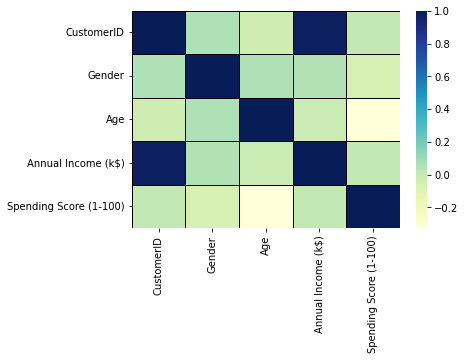

In [4]:
korelasi = df.corr()
sns.heatmap(data = korelasi, cmap="YlGnBu", linewidths=0.5, linecolor="black")

In [5]:
df.corr()['Spending Score (1-100)'].sort_values()

Age                      -0.327227
Gender                   -0.058109
Annual Income (k$)        0.009903
CustomerID                0.013835
Spending Score (1-100)    1.000000
Name: Spending Score (1-100), dtype: float64

In [13]:
data=df.iloc[:,[3,4]].values

In [5]:
# dt_10kol = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
dt_10kol = df[['Annual Income (k$)', 'Spending Score (1-100)']]




In [6]:
array_10kol = np.array(dt_10kol.values)

In [7]:
X = array_10kol


In [8]:
kmeans_model = KMeans(n_clusters=5, random_state=0).fit(X)

In [9]:
klaster_objek = kmeans_model.labels_
centroids = kmeans_model.cluster_centers_

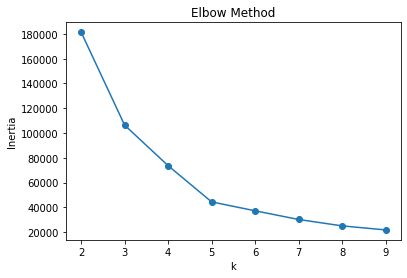

In [10]:
intertia = []
silhouette_coefficients = []
K = range(2,10)
for k in K:
    kmeans_model = KMeans(n_clusters=k, random_state=0).fit(X)
    intertia.append(kmeans_model.inertia_)
    score = silhouette_score(X, kmeans_model.labels_,  metric='euclidean')
    silhouette_coefficients.append(score)

#visualisasi hasil elbow method    
plt.plot(K, intertia, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 10))
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

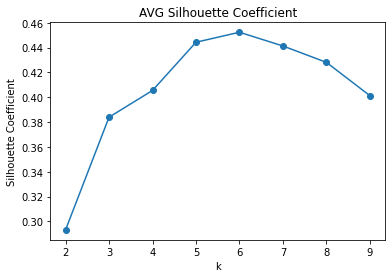

In [48]:
plt.plot(K, silhouette_coefficients, marker= "o")
plt.xlabel('k')
plt.xticks(np.arange(2, 10))
plt.ylabel("Silhouette Coefficient")
plt.title("AVG Silhouette Coefficient")
plt.show()


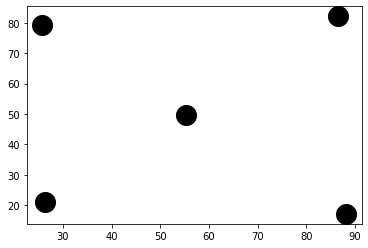

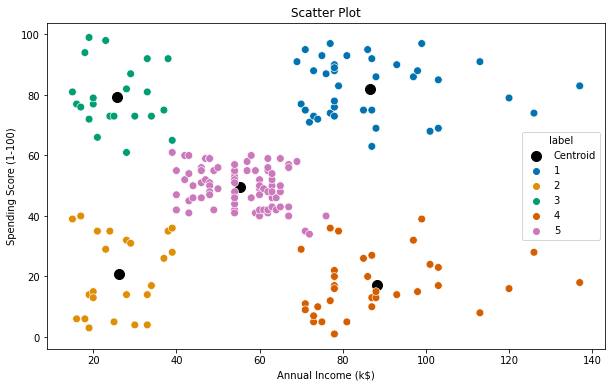

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

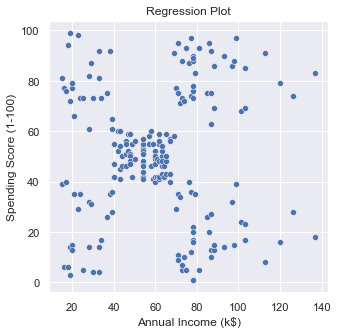

In [39]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

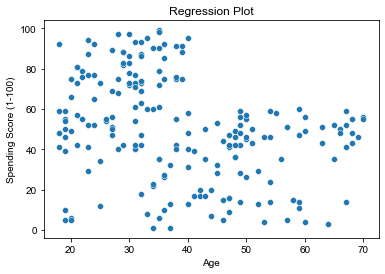

In [4]:
sns.scatterplot(df['Age'], df['Spending Score (1-100)'])
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

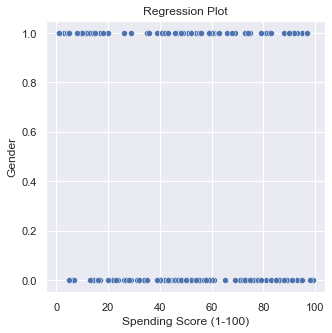

In [6]:
sns.scatterplot(df['Gender'], df['Spending Score (1-100)'])
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

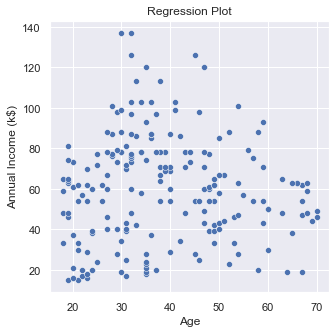

In [7]:
sns.scatterplot(df['Age'], df['Annual Income (k$)'])
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Regression Plot')

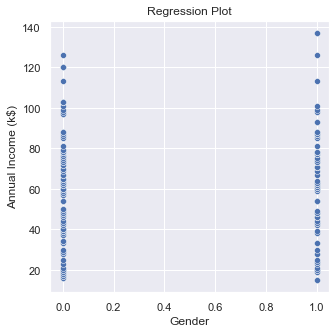

In [8]:
sns.scatterplot(df['Gender'], df['Annual Income (k$)'])
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

c:\Users\anton\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

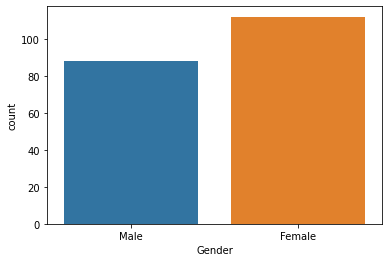

In [20]:
sns.countplot(df['Gender'])

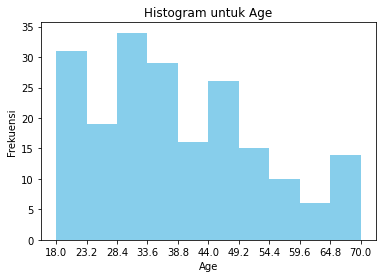

In [23]:
count, bin_edges = np.histogram(df['Age'])
df['Age'].plot(kind = 'hist', xticks = bin_edges, color = "skyblue")
plt.title('Histogram untuk Age')
plt.ylabel('Frekuensi')
plt.xlabel('Age')
plt.show()

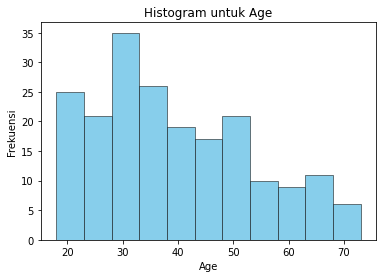

In [36]:
binwidth = 5
plt.hist(df['Age'], bins=range(min(df['Age']), max(df['Age']) + binwidth, binwidth), color = "skyblue", edgecolor='black', linewidth=0.5)
plt.title('Histogram untuk Age')
plt.ylabel('Frekuensi')
plt.xlabel('Age')
plt.show()

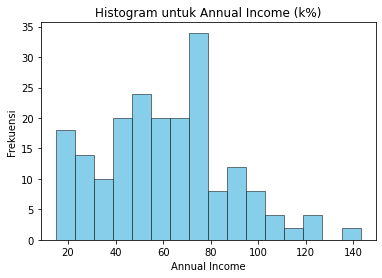

In [40]:
binwidth = 8
plt.hist(df['Annual Income (k$)'], bins=range(min(df['Annual Income (k$)']), max(df['Annual Income (k$)']) + binwidth, binwidth), color = "skyblue", edgecolor='black', linewidth=0.5)
plt.title('Histogram untuk Annual Income (k%)')
plt.ylabel('Frekuensi')
plt.xlabel('Annual Income')
plt.show()

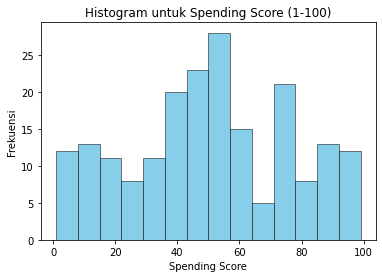

In [43]:
binwidth = 7
plt.hist(df['Spending Score (1-100)'], bins=range(min(df['Spending Score (1-100)']), max(df['Spending Score (1-100)']) + binwidth, binwidth), color = "skyblue", edgecolor='black', linewidth=0.5)
plt.title('Histogram untuk Spending Score (1-100)')
plt.ylabel('Frekuensi')
plt.xlabel('Spending Score')
plt.show()

In [59]:
cust1=df[df["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------------------")
cust2=df[df["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------------------")
cust3=df[df["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------------------")
cust4=df[df["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("--------------------------------------------")
cust5=df[df["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("--------------------------------------------")

KeyError: 'label'

----

In [17]:
kmeans_model = KMeans(n_clusters=3, random_state=0).fit(X)

dt_baru_iris = pd.read_csv('Mall_Customers.csv', delimiter = ',')

In [21]:
dt_baru_iris['Gender'].replace(['Male', 'Female'], [1, 0], inplace=True)

In [24]:
dt_baru_iris.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [30]:
dt_4kol = dt_baru_iris[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [31]:
X_new = np.array(dt_4kol.values)

In [32]:
kmeans_model.predict(X_new)




array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [33]:
pickle.dump(kmeans_model, open('kmeans_model_irish', 'wb'))

loaded_model = pickle.load(open('kmeans_model_irish', 'rb'))

loaded_model.predict(X_new)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [ ]:
import pickle
# pickle.dump(model, open(filename, 'wb')) #Saving the model
pickle.dump(kmeans_model, open('kmeans_model_irish', 'wb'))

# Baca model dan gunakan kembali untuk memprediksi cluster objek baru
loaded_model = pickle.load(open('kmeans_model_irish', 'rb'))

#Cari (predict) cluster dari rekord-rekord bunga Iris yg baru
loaded_model.predict(X_new)

In [13]:
kmeans_1=KMeans(n_clusters=5)
kmeans_1.fit(X)

KMeans(n_clusters=5)

In [14]:
y=kmeans_1.predict(X)

In [15]:
df1 = df

In [16]:
df1["label"] = y+1

In [95]:
df1.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,1,19,15,39,2
1,2,1,21,15,81,5
2,3,0,20,16,6,2
3,4,0,23,16,77,5
4,5,0,31,17,40,2


In [97]:
cluster1=df1[df1["label"]==1]
print('Cluster 1')
print('Jumlah Customer =', len(cluster1))
print('Daftar Customer', cluster1["CustomerID"].values)
print()
cluster2=df1[df1["label"]==2]
print('Cluster 2')
print('Jumlah Customer =', len(cluster2))
print('Daftar Customer', cluster2["CustomerID"].values)
print()
cluster3=df1[df1["label"]==3]
print('Cluster 3')
print('Jumlah Customer =', len(cluster3))
print('Daftar Customer', cluster3["CustomerID"].values)
print()
cluster4=df1[df1["label"]==4]
print('Cluster 4')
print('Jumlah Customer =', len(cluster4))
print('Daftar Customer', cluster4["CustomerID"].values)
print()
cluster5=df1[df1["label"]==5]
print('Cluster 5')
print('Jumlah Customer =', len(cluster5))
print('Daftar Customer', cluster5["CustomerID"].values)


Cluster 1
Jumlah Customer = 39
Daftar Customer [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Cluster 2
Jumlah Customer = 23
Daftar Customer [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Cluster 3
Jumlah Customer = 36
Daftar Customer [125 129 131 133 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Cluster 4
Jumlah Customer = 79
Daftar Customer [ 47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118
 119 120 121 122 123 127 143]

Cluster 5
Jumlah Customer = 23
Daftar Customer [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 

In [120]:
print(len(cluster1) / 200 * 100)
print(len(cluster2) / 200 * 100)
print(len(cluster3) / 200 * 100)
print(len(cluster4) / 200 * 100)
print(len(cluster5) / 200 * 100)

19.5
11.5
18.0
39.5
11.5


In [121]:
annual1 = cluster1['Annual Income (k$)'].values
annual2 = cluster2['Annual Income (k$)'].values
annual3 = cluster3['Annual Income (k$)'].values
annual4 = cluster4['Annual Income (k$)'].values
annual5 = cluster5['Annual Income (k$)'].values

spend1 = cluster1['Spending Score (1-100)'].values
spend2 = cluster2['Spending Score (1-100)'].values
spend3 = cluster3['Spending Score (1-100)'].values
spend4 = cluster4['Spending Score (1-100)'].values
spend5 = cluster5['Spending Score (1-100)'].values

In [125]:
Std_a = np.std(annual1)
mean_a = np.mean(annual1)
print(Std_a)
print(mean_a)
print()
Std = np.std(spend1)
mean = np.mean(spend1)
print(Std)
print(mean)

16.10199247719673
86.53846153846153

9.243651978879363
82.12820512820512


In [126]:
Std_a = np.std(annual2)
mean_a = np.mean(annual2)
print(Std_a)
print(mean_a)
print()
Std = np.std(spend2)
mean = np.mean(spend2)
print(Std)
print(mean)

7.720299513274676
26.304347826086957

12.731040612811906
20.91304347826087


In [127]:
Std_a = np.std(annual3)
mean_a = np.mean(annual3)
print(Std_a)
print(mean_a)
print()
Std = np.std(spend3)
mean = np.mean(spend3)
print(Std)
print(mean)

16.157858425202548
87.75

10.061960820613224
17.583333333333332


In [129]:
Std_a = np.std(annual4)
mean_a = np.mean(annual4)
print(Std_a)
print(mean_a)
print()
Std = np.std(spend4)
mean = np.mean(spend4)
print(Std)
print(mean)

8.655358914720832
55.29113924050633

6.20266080981502
49.56962025316456


In [128]:
Std_a = np.std(annual5)
mean_a = np.mean(annual5)
print(Std_a)
print(mean_a)
print()
Std = np.std(spend5)
mean = np.mean(spend5)
print(Std)
print(mean)

7.720299513274676
26.304347826086957

10.712958780015269
78.56521739130434


NameError: name 'df1' is not defined

<Figure size 720x432 with 0 Axes>

------

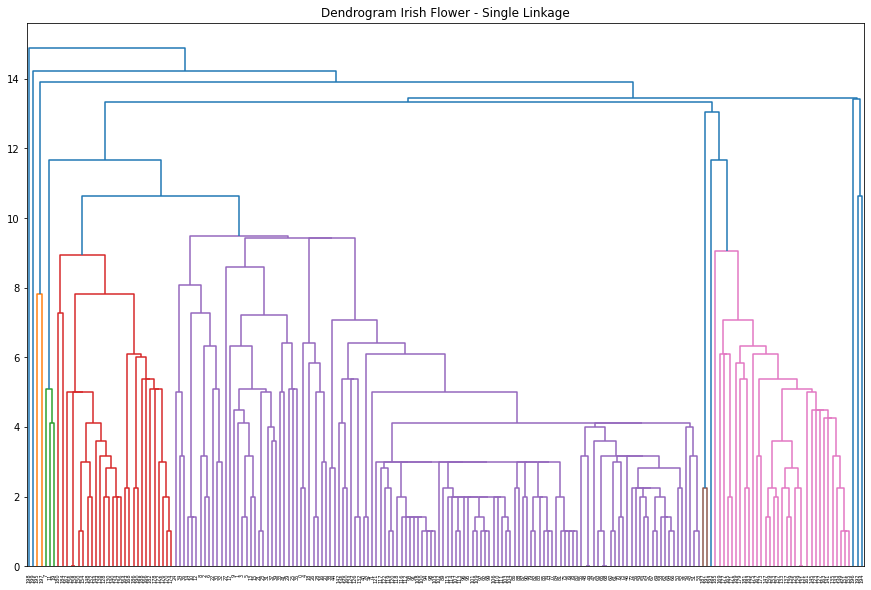

In [12]:
plt.figure(figsize=(15, 10))
plt.title("Dendrogram Irish Flower - Single Linkage")
dend = sch.dendrogram(sch.linkage(X, method='single'))
plt.show()

In [23]:
score = silhouette_score(X, agglo_model.labels_,  metric='euclidean')
print(score) 

0.2694896445402342


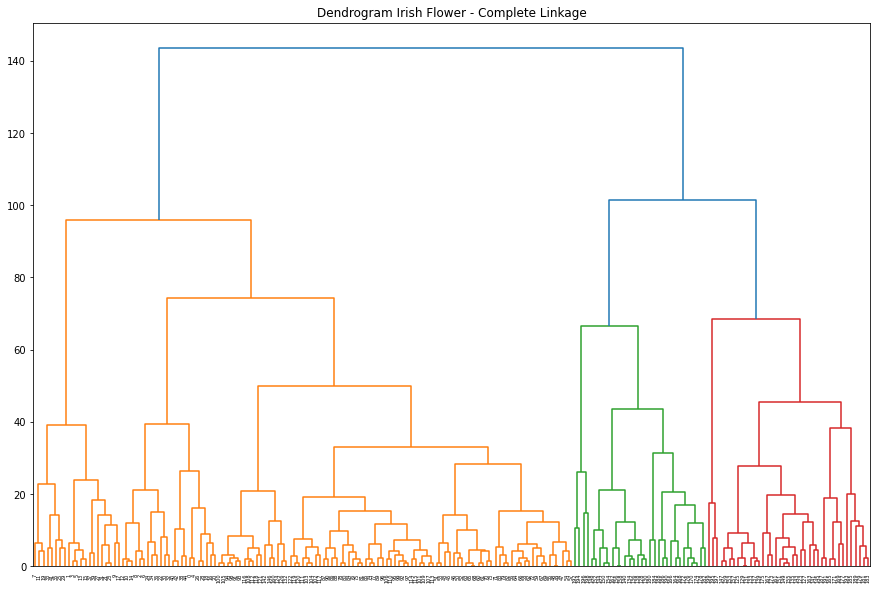

In [24]:
plt.figure(figsize=(15, 10))
plt.title("Dendrogram Irish Flower - Complete Linkage")
dend = sch.dendrogram(sch.linkage(X, method='complete'))
plt.show()
# Terlihat bahwa paling baik, dataset Irish dikelompokkan menjadi 2 klaster



In [25]:
# Cek koefisien silhoutte 
agglo_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
agglo_model.fit_predict(X)
score = silhouette_score(X, agglo_model.labels_,  metric='euclidean')
print(score)

0.5529945955148897


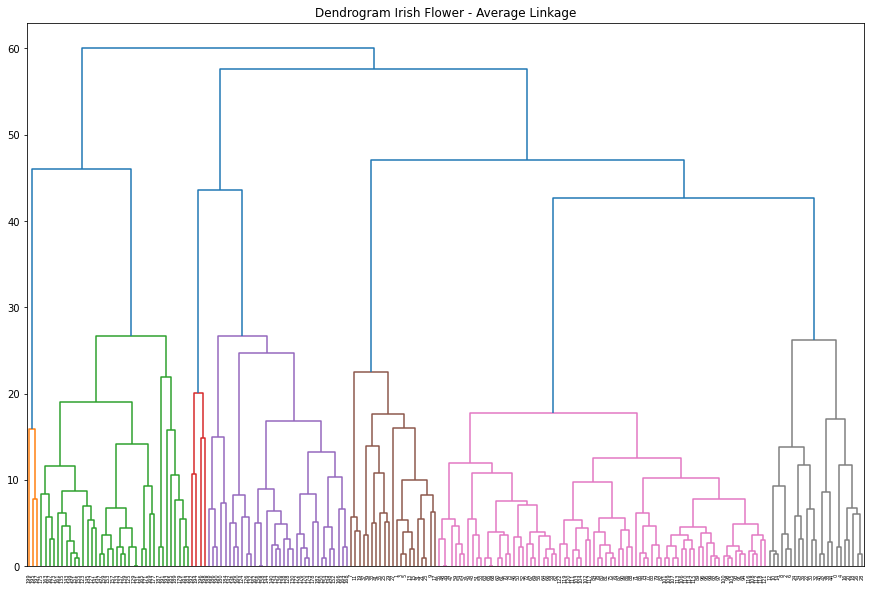

In [26]:
plt.figure(figsize=(15, 10))
plt.title("Dendrogram Irish Flower - Average Linkage")
dend = sch.dendrogram(sch.linkage(X, method='average'))
plt.show()
# Terlihat bahwa paling baik, dataset Irish dikelompokkan menjadi 2 klaster



In [30]:
# Cek koefisien silhoutte 
agglo_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
agglo_model.fit_predict(X)
score = silhouette_score(X, agglo_model.labels_,  metric='euclidean')
print(score) # 0.7

0.4791911539647448


In [63]:
agglo_model.n_clusters

labels = agglo_model.labels_
#Buat dataframe dari numpy array labels, nama kolom: cls
df_labels = pd.DataFrame({'cls': labels})

# Gabungkan datafrane dataset dan label cluster
df = dt_10kol.join(df_labels)

#Hitung pola tiap kelompok
df_pola = df.groupby(['cls']).describe()

In [64]:
df_pola

Annual Income (k$)                                                       \
                 count        mean        std    min     25%    50%     75%   
cls                                                                           
0                 83.0   54.759036   9.511983   28.0   47.50   54.0   62.00   
1                 23.0   26.304348   7.893811   15.0   19.50   25.0   33.00   
2                 31.0   83.612903  10.032206   71.0   77.00   79.0   88.00   
3                 20.0   24.950000   7.287155   15.0   19.00   23.5   30.75   
4                 36.0   83.111111  11.295455   69.0   74.75   78.0   88.00   
5                  4.0  124.000000  10.165300  113.0  118.25  123.0  128.75   
6                  3.0  127.666667   8.621678  120.0  123.00  126.0  131.50   

           Spending Score (1-100)             ... Gender        Age  \
       max                  count       mean  ...    75%  max count   
cls                                           ...                     
0     76.0                   83.0  49.771084  ...    1.0  1.0  83.0   
1     39.0                   23.0  20.913043  ...    1.0  1.0  23.0   
2    103.0                   31.0  17.258065  ...    1.0  1.0  31.0   
3     38.0                   20.0  81.000000  ...    1.0  1.0  20.0   
4    113.0                   36.0  82.416667  ...    1.0  1.0  36.0   
5    137.0                    4.0  17.500000  ...    1.0  1.0   4.0   
6    137.0                    3.0  78.666667  ...    1.0  1.0   3.0   

                                                           
          mean        std   min    25%   50%    75%   max  
cls                                                        
0    42.156627  16.533397  18.0  27.00  45.0  54.00  70.0  
1    45.217391  13.228607  19.0  35.50  46.0  53.50  67.0  
2    42.000000  11.293066  19.0  36.00  43.0  49.00  59.0  
3    24.850000   5.029126  18.0  21.00  23.0  29.25  35.0  
4    32.722222   3.836748  27.0  30.00  32.0  36.00  40.0  
5    39.250000   7.847505  32.0  32.75  39.0  45.50  47.0  
6    32.333333   2.516611  30.0  31.00  32.0  33.50  35.0  

[7 rows x 32 columns]

-----

In [61]:
dt_10kol = df[['Annual Income (k$)', 'Spending Score (1-100)', 'Gender', 'Age']]
array_10kol = np.array(dt_10kol.values)
X = array_10kol

----

In [62]:
K = range(3,8)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='complete')
    agglo_model.fit_predict(X)
    score = silhouette_score(X, agglo_model.labels_,  metric='euclidean')
    print("k =", k)
    print(score)

k = 3
0.3812859576468096
k = 4
0.4102091359195185
k = 5
0.43997527212476695
k = 6
0.42326551539571566
k = 7
0.4141207457542422


In [65]:
K = range(3,8)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='average')
    agglo_model.fit_predict(X)
    score = silhouette_score(X, agglo_model.labels_,  metric='euclidean')
    print("k =", k)
    print(score)

k = 3
0.3812859576468096
k = 4
0.4102091359195185
k = 5
0.43521075902386996
k = 6
0.4184037015474744
k = 7
0.40998315593156753


In [56]:
K = range(2,8)
for k in K:
    agglo_model = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='single')
    agglo_model.fit_predict(X)
    score = silhouette_score(X, agglo_model.labels_,  metric='euclidean')
    print("k =", k)
    print(score)

k = 2
0.39088488327271015
k = 3
0.3049360034125826
k = 4
0.26287653629417757
k = 5
0.24294247504120228
k = 6
0.16494447557214534
k = 7
0.1365029737488583


----

In [151]:
dt2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [152]:
models = linkage(dt2, method='complete',metric='euclidean')
labels = cut_tree(models, n_clusters=5).reshape(-1, )

In [ ]:
df1 = df

In [159]:
df1['Cluster_Id'] = labels + 1
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_Id
0,1,1,19,15,39,1
1,2,1,21,15,81,2
2,3,0,20,16,6,1
3,4,0,23,16,77,2
4,5,0,31,17,40,1


In [155]:
df1['Cluster_Id'].value_counts()

3    85
4    39
5    32
1    23
2    21
Name: Cluster_Id, dtype: int64

In [156]:
cluster1=df1[df1['Cluster_Id']==1]
print('Daftar Customer', cluster1['CustomerID'].values)
print()
cluster2=df1[df1['Cluster_Id']==2]
print('Daftar Customer', cluster2['CustomerID'].values)
print()
cluster3=df1[df1['Cluster_Id']==3]
print('Daftar Customer', cluster3['CustomerID'].values)
print()
cluster4=df1[df1['Cluster_Id']==4]
print('Daftar Customer', cluster4['CustomerID'].values)
print()
cluster5=df1[df1['Cluster_Id']==5]
print('Daftar Customer', cluster5['CustomerID'].values)
print()
cluster6=df1[df1['Cluster_Id']==6]
print('Daftar Customer', cluster6['CustomerID'].values)
print()
cluster7=df1[df1['Cluster_Id']==7]
print('Daftar Customer', cluster7['CustomerID'].values)
print()


Daftar Customer [ 1  3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45]

Daftar Customer [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42]

Daftar Customer [ 44  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 125 127 133 143 147 161]

Daftar Customer [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192 194
 196 198 200]

Daftar Customer [129 131 135 137 139 141 145 149 151 153 155 157 159 163 165 167 169 171
 173 175 177 179 181 183 185 187 189 191 193 195 197 199]

Daftar Customer []

Daftar Customer []



In [157]:
print(df1[['Annual Income (k$)','Spending Score (1-100)', 'Cluster_Id']].groupby('Cluster_Id').mean())

            Annual Income (k$)  Spending Score (1-100)
Cluster_Id                                            
1                    26.304348               20.913043
2                    25.095238               80.047619
3                    55.811765               49.129412
4                    86.538462               82.128205
5                    89.406250               15.593750


In [108]:
clusterX = df[['Age', 'Annual Income (k$)','Spending Score (1-100)','Cluster_Id']].groupby('Cluster_Id').mean()

C:\Users\anton\AppData\Local\Temp\ipykernel_13808\2890712637.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clusterX[df['Cluster_Id'] == 1]


,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
1,34.350000,24.475000,50.925000
2,46.659091,46.409091,49.204545
3,38.666667,62.452381,48.214286
4,35.404255,77.829787,56.617021
5,39.074074,104.074074,42.666667


In [110]:
may_flights = clusterX.query("Cluster_Id == 1")
may_flights

,Age,Annual Income (k$),Spending Score (1-100)
Cluster_Id,,,
1,34.35,24.475,50.925


Text(0.5, 1.0, 'Regression Plot')

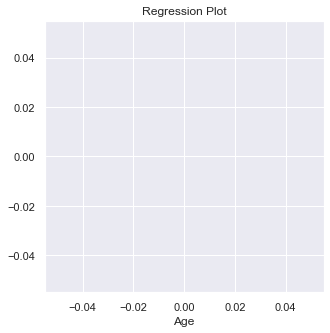

In [112]:
sns.lineplot(data=may_flights, x = 'Age')
sns.set(rc={'figure.figsize':(5, 5)})
plt.title("Regression Plot")

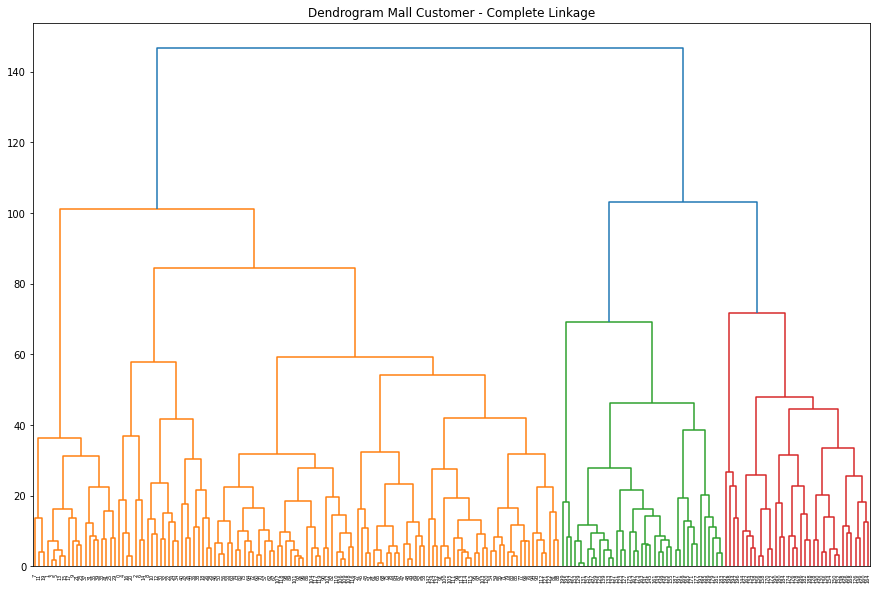

Time execution : 1965.0471210479736 ms


In [54]:
start = time.time()

agglo_model_comp = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
agglo_model_comp.fit_predict(X)
plt.figure(figsize=(15, 10))
plt.title("Dendrogram Mall Customer - Complete Linkage")
dend = sch.dendrogram(sch.linkage(X, method='complete'))
plt.show()

end = time.time()

print("Time execution :", (end-start) * 10**3, "ms")

In [26]:
intertia = []
silhouette_coefficients = []

In [53]:
start = time.time()

kmeans_model = KMeans(n_clusters=5, random_state=0).fit(X)
intertia.append(kmeans_model.inertia_)
score = silhouette_score(X, kmeans_model.labels_,  metric='euclidean')
silhouette_coefficients.append(score)


end = time.time()

print("Time execution :", (end-start) * 10**3, "ms")

Time execution : 30.605316162109375 ms


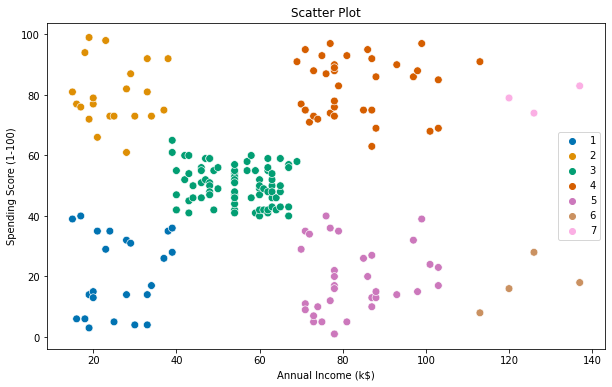

In [150]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue= labels + 1,  
                 palette='colorblind', legend='full',data = df1  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Scatter Plot')
plt.show()

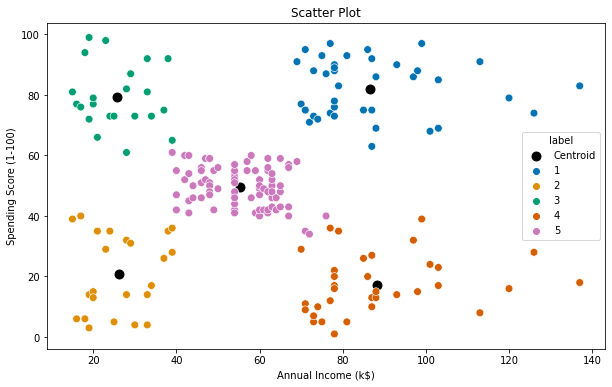

In [22]:
plt.figure(figsize=(10,6))
plt.scatter(centroids[:,0],centroids[:,1],s= 80, c ='black',label='Centroid')
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",  
                 palette='colorblind', legend='full',data = df1  ,s = 60 )

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Scatter Plot')
plt.show()